In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from lift_simulation import LiftSimulation, run_lift_simulation_for_lifts

In [2]:
# hp cause (test all posible values)
def hp_cause(max_num_lifts, awt_thr):
    for num_lifts in range(1, max_num_lifts + 1):
        awt = run_lift_simulation_for_lifts(num_lifts)
        if awt < awt_thr:
            return num_lifts
    return None # f'num_lifts is not a cause of awt < {awt_thr} as long as num_lifts <= {max_num_lifts}'


def hp_cause_mm(max_num_lifts, awt_thr):
    awt = run_lift_simulation_for_lifts(max_num_lifts)
    if awt < awt_thr:
        return max_num_lifts # FIXME: use bisect num_lifts
    return None # f'num_lifts is not a cause of awt < {awt_thr} as long as num_lifts <= {max_num_lifts}'

In [4]:
def run_exp(max_num_lifts, awt_thr):
    tic = time.time()
    hp_cause(max_num_lifts, awt_thr)
    toc = time.time()
    d_hp = toc - tic

    tic = time.time()
    hp_cause_mm(max_num_lifts, awt_thr)
    toc = time.time()
    d_hp_mm = toc - tic

    return {'d_hp': d_hp, 'd_hp_mm': d_hp_mm}

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [06:50<00:00,  4.10s/it]


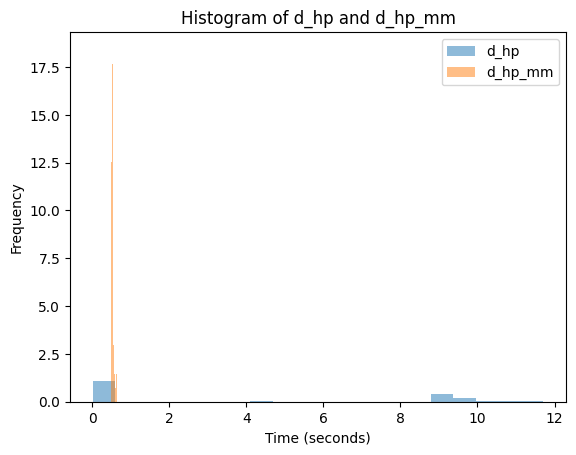

In [5]:
max_num_lifts= 40
awt_thr_values = np.random.uniform(10, 100, 100)
results = [run_exp(max_num_lifts, awt_thr) for awt_thr in tqdm(awt_thr_values)]

d_hp_list = [res['d_hp'] for res in results]
d_hp_mm_list = [res['d_hp_mm'] for res in results]

plt.hist(d_hp_list, bins=20, alpha=0.5, label='d_hp', density=True)
plt.hist(d_hp_mm_list, bins=20, alpha=0.5, label='d_hp_mm', density=True)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of d_hp and d_hp_mm')
plt.show()


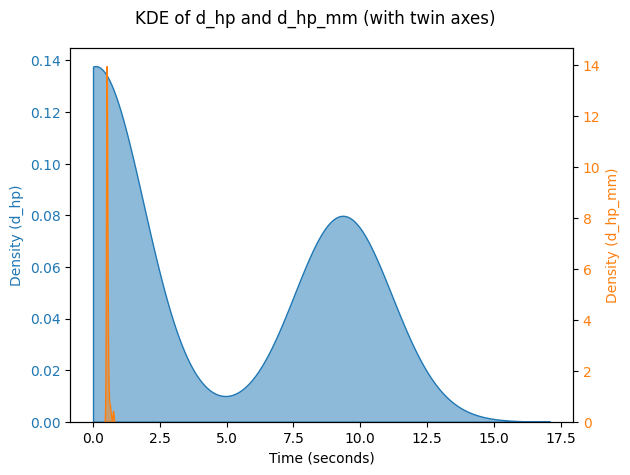

In [12]:
import seaborn as sns

fig, ax1 = plt.subplots()
color1 = 'tab:blue'
color2 = 'tab:orange'

# Plot KDE for d_hp_list on ax1 (left y-axis), restrict to non-negative values
sns.kdeplot(d_hp_list, ax=ax1, color=color1, label='d_hp', fill=True, alpha=0.5, clip=(0, None))
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Density (d_hp)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for d_hp_mm_list, restrict to non-negative values
ax2 = ax1.twinx()
sns.kdeplot(d_hp_mm_list, ax=ax2, color=color2, label='d_hp_mm', fill=True, alpha=0.5, clip=(0, None))
ax2.set_ylabel('Density (d_hp_mm)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle('KDE of d_hp and d_hp_mm (with twin axes)')
fig.tight_layout()
plt.show()
